<a href="https://colab.research.google.com/github/ana-gleice/SAP-4/blob/main/LogisticRegression_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

In [32]:
dataset = pd.read_excel('data_td.xlsx')


In [ ]:
dataset.head()

,DS_MARCA,NR_SERIE,DT_ENSAIO,DS_METODO,TP_ENSAIO,UF_ENSAIO,DS_RESULTADO,DESVIO_PONTO_ZERO,DESVIO_CONC_I,DESVIO_CONC_II,DESVIO_CONC_III,VL_ERRO_CONC_III_01,VL_ERRO_CONC_III_02,VL_ERRO_CONC_III_03,VL_ERRO_CONC_III_04,VL_ERRO_CONC_III_05,VL_ERRO_CONC_III_06,VL_ERRO_CONC_III_07,VL_ERRO_CONC_III_08,VL_ERRO_CONC_III_09,VL_ERRO_CONC_III_10,CLASSE
0,ALCOLIZER,22000002,2019-04-29,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.001,0.792,-0.239,-0.239,1.671,1.671,1.432,1.432,1.432,1.432,1.909,1.909,0
1,ALCOLIZER,22000007,2019-04-29,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.002,0.410,2.148,2.148,2.864,2.864,3.103,3.103,2.864,2.864,2.148,2.148,1
2,ALCOLIZER,22000008,2019-04-25,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.001,0.397,4.296,3.819,4.057,2.864,3.819,3.819,4.057,3.580,4.296,3.819,1
3,ALCOLIZER,22000027,2019-04-24,Liquido,Inicial,PE,Aprovado,0.0,0.004,0.001,0.405,1.193,1.193,0.716,0.477,1.671,0.955,1.671,1.193,0.716,0.716,1
4,ALCOLIZER,22000034,2019-05-02,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.003,0.529,1.909,3.341,2.148,2.387,2.864,2.864,2.387,2.148,3.341,1.909,1


In [33]:
x = dataset.drop(columns=['DS_MARCA', 'NR_SERIE', 'DT_ENSAIO', 'DS_METODO', 'UF_ENSAIO','TP_ENSAIO','DS_RESULTADO','CLASSE', 'DESVIO_PONTO_ZERO', 'DESVIO_CONC_I', 'DESVIO_CONC_II', 'VL_ERRO_CONC_III_03', 'VL_ERRO_CONC_III_04', 'VL_ERRO_CONC_III_05', 'VL_ERRO_CONC_III_06',
 'VL_ERRO_CONC_III_07', 'VL_ERRO_CONC_III_08', 'VL_ERRO_CONC_III_09', 'VL_ERRO_CONC_III_10'])
y = dataset.iloc[:,-1].values

In [ ]:
print(y)

[0 1 1 ... 1 1 1]


In [ ]:
print(x)

      DESVIO_CONC_III  VL_ERRO_CONC_III_01  VL_ERRO_CONC_III_02
0               0.792               -0.239               -0.239
1               0.410                2.148                2.148
2               0.397                4.296                3.819
3               0.405                1.193                1.193
4               0.529                1.909                3.341
...               ...                  ...                  ...
3169            0.552                0.714                0.714
3170            0.495               -3.810               -3.095
3171            0.497               -2.857               -2.857
3172            0.286               -3.095               -3.571
3173            0.208               -5.476               -5.476

[3174 rows x 3 columns]


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
print(x_train)

      DESVIO_CONC_III  VL_ERRO_CONC_III_01  VL_ERRO_CONC_III_02
1646            0.231                0.000                0.000
1817            0.145                0.208                0.000
1396            0.177               -1.446               -1.860
2876            0.233                0.000               -0.212
491             0.491               -1.040               -0.416
...               ...                  ...                  ...
763             0.720               -3.299               -2.881
835             0.509                0.418                1.461
1653            0.836               -2.282               -3.112
2607            1.180               -3.341               -1.671
2732            0.592                3.341                3.103

[2539 rows x 3 columns]


In [ ]:
x_train.shape

(2539, 3)

In [ ]:
y_test.shape

(635,)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-0.75524214  0.49984846  0.48165824]
 [-0.97156256  0.58497431  0.48165824]
 [-0.89107124 -0.09193996 -0.29979236]
 ...
 [ 0.76654686 -0.43408043 -0.82580104]
 [ 1.63182854 -0.86748564 -0.22038689]
 [ 0.15280056  1.86718256  1.78533631]]


In [36]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_res, y_res = rus.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_res.shape

(262,)

1    131
0    131
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


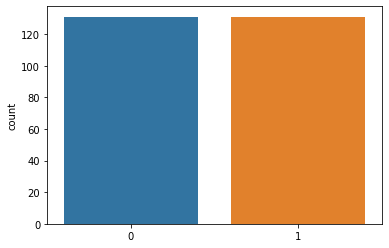

In [ ]:
print(pd.Series(y_res).value_counts())
sns.countplot(y_res);

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
model_res = LogisticRegression()
model_res.fit(x_res, y_res)
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
 
# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(x_test)
x_pred = model_res.predict(x_train)
y_proba_res = model_res.predict_proba(x_test)

 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))
 
print(accuracy_score(y_test, y_pred_res))


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.0730    0.4167    0.1242        24
           1     0.9719    0.7921    0.8729       611

    accuracy                         0.7780       635
   macro avg     0.5224    0.6044    0.4985       635
weighted avg     0.9379    0.7780    0.8446       635

Acurácia: 0.7780

0.7779527559055118


In [38]:
print(y_proba_res)

[[0.51494421 0.48505579]
 [0.36093317 0.63906683]
 [0.33338539 0.66661461]
 ...
 [0.44992269 0.55007731]
 [0.43438633 0.56561367]
 [0.36266091 0.63733909]]


In [39]:
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [44]:

k = (y_test == 0)
index = np.where(k)[0]



In [45]:
index


array([ 47,  87,  91, 108, 126, 250, 268, 292, 297, 328, 341, 388, 396,
       410, 411, 415, 468, 508, 509, 510, 567, 594, 601, 624])

In [47]:
y_proba_res[index]

array([[0.48547199, 0.51452801],
       [0.58312924, 0.41687076],
       [0.3862261 , 0.6137739 ],
       [0.36321016, 0.63678984],
       [0.51721906, 0.48278094],
       [0.53387428, 0.46612572],
       [0.59815228, 0.40184772],
       [0.48451064, 0.51548936],
       [0.57481264, 0.42518736],
       [0.36870105, 0.63129895],
       [0.40248333, 0.59751667],
       [0.46509337, 0.53490663],
       [0.5053348 , 0.4946652 ],
       [0.5232942 , 0.4767058 ],
       [0.44986625, 0.55013375],
       [0.57282879, 0.42717121],
       [0.44724012, 0.55275988],
       [0.28380134, 0.71619866],
       [0.61254409, 0.38745591],
       [0.43452259, 0.56547741],
       [0.49896705, 0.50103295],
       [0.45644082, 0.54355918],
       [0.50455421, 0.49544579],
       [0.4529087 , 0.5470913 ]])

In [ ]:
cm = confusion_matrix(y_test, y_pred_res)
print(cm)

[[ 14  10]
 [160 451]]


In [ ]:
cm = confusion_matrix(y_train, x_pred)
print(cm)

[[  81   50]
 [ 733 1675]]
